# ** Introduction:**
Traffic flow prediction (TFP) means predicting the volume and density of traffic flow, usually to control vehicle movement, reduce traffic jams, and create the optimal (least-time or energy-consuming) route. With the recent advancement in Artificial intelligence, Machine learning (ML), Deep learning (DL), and Big data, research in the field of predicting traffic flow has been expanded extensively.
TFP is the key component of Intelligent Transport Systems (ITS) and can assist ITS to forecast traffic flow. Large cities have exceedingly difficult traffic regulations. many countries have adopted ITS to reduce the costs associated with traffic congestion. This study reviews the application of artificial neural network (ANN), ML, DL and other techniques and models for TFP. Finally, we will propose our own predictive model using DL, train and test it, analyze the accuracy and compare the accuracy of our model with other models.

# Issues for traffic congestion:
In many places across the world, traffic congestion is a serious issue. It is difficult to accurately define and forecast because it is influenced by a wide range of diverse elements. Some of the main problems caused by traffic congestion are air pollution, lengthy commutes, traffic jams, unreliable public transportation, and traffic accidents.

# Intelligent transportation system (ITS):
ITS is an integrated traffic management system composed of advanced data communication, information processing and traffic management technologies. In recent years, the success of deep learning in computer vision, speed recognition, and natural language processing makes it natural to apply it to ITS. We divide the applications in ITS into visual recognition tasks, TFP, traffic speed prediction (TSP), travel time prediction (TTP) and other tasks. The term "ITS" refers to the use of systems for communication, information, transportation, and urban transportation.

# Data types, sources and TFP parameters:
**Mapping data**:
First of all, we need to have a detailed map of road networks with related attributes. Connecting to such global mapping data providers as Google Maps.

**Traffic information**:
Then, we need to collect both historical and current traffic-related information such as the number of vehicles passing at a certain point, their speed, and type (trucks, light vehicles, etc.). Devices used to collect this data are loop detectors, cameras, weigh in motion sensors, and radars, or other sensor technologies.

**Weather information**:
Weather data (historical, current, and forecasted) is also necessary as meteorological conditions impact the road situation and driving speed. There are lots of weather data providers such as OpenWeather or Tomorrow.io.

**Additional data on road conditions**:
**a) Flow**
**b) Speed**
**c) Day**
**d) Day of type**
**e) Clock time**
**f) Weather condition**

# Traffic theory

**1.Traffic flow**
**2.Traffic density**
**3.Free flow**

#Algorithms for generating traffic predictions (MODELS):
**Statistical approach:**
Using statistical techniques, we can recognize traffic patterns at various scales, such as during the day, on various days of the week, seasonally, etc. Compared to machine learning methods, they are typically quicker, cheaper, and easier to execute. However, because they can't handle as much multivariate data, they are less accurate.

**Machine learning approach:**
We can build predictive models using machine learning (ML) that take into account the massive amounts of heterogeneous data from many sources. The use of ML algorithms to forecast traffic has been the subject of numerous studies. Here are a few effective examples.   The random forest method builds several decision trees and combines their data to produce precise forecasts.

#Data set:
**
The Metro Interstate dataset:**
The Interstate Traffic Volume Dataset contains information about the hourly traffic volume on the West-bound lane of Interstate-94 (I-94) in the US. The dataset includes hourly weather and temperature reports from 2015 to 2018.

In [ ]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *


In [ ]:

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
def describe(df):
    numerical_df = df.select_dtypes(include=np.number)
    return pd.concat([numerical_df.describe().T, numerical_df.skew().rename('skew'),], axis=1)

describe(df_raw)

,count,mean,std,min,25%,50%,75%,max,skew
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07,-2.247226
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30,219.389036
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51,48.367484
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00,-0.197257
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00,-0.089381


In [ ]:
df_raw.isna().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

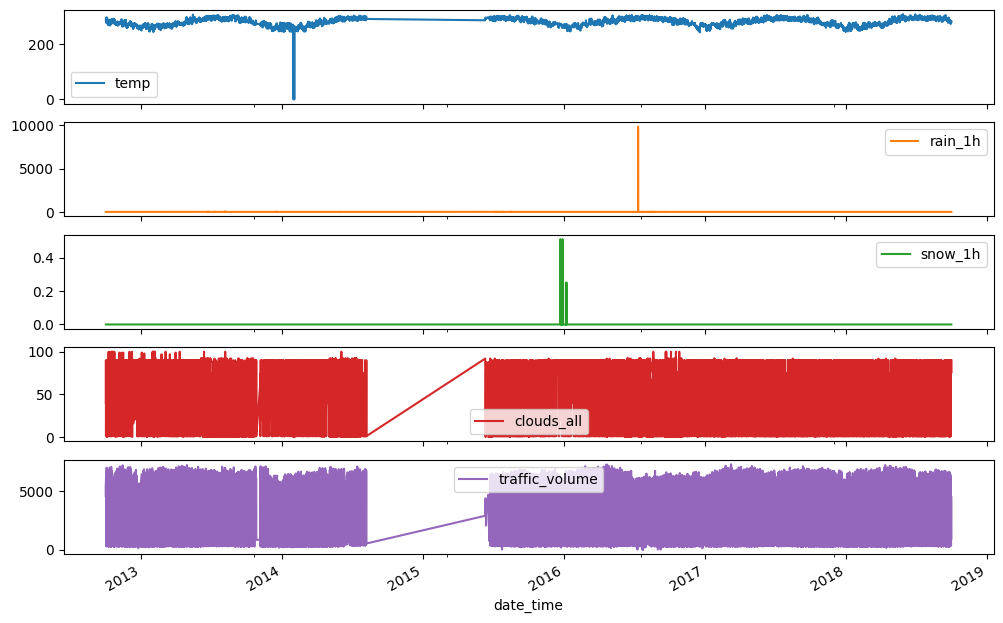

In [ ]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


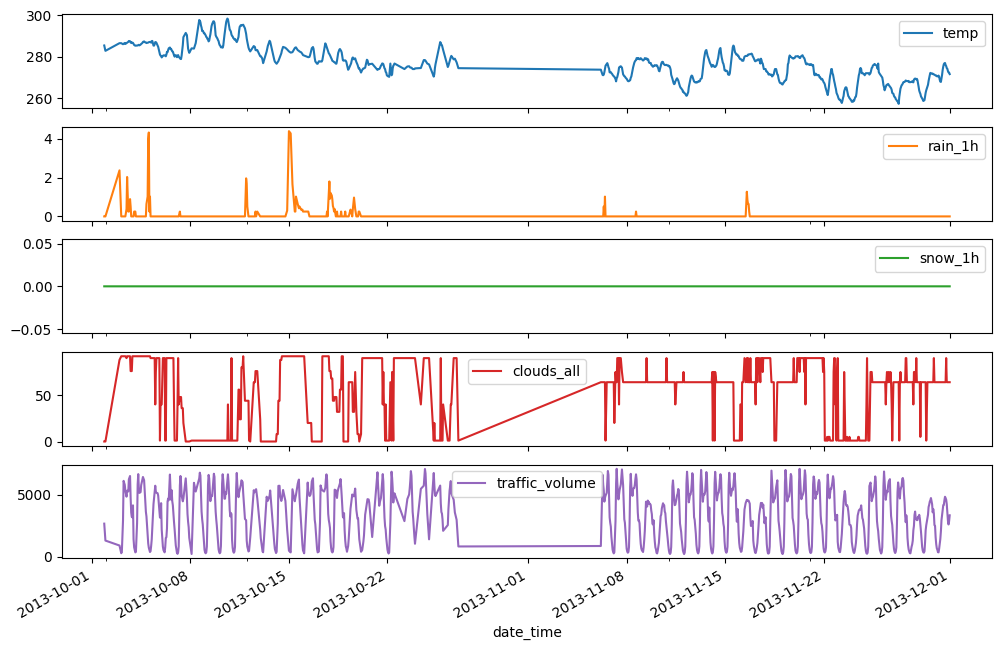

In [ ]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))


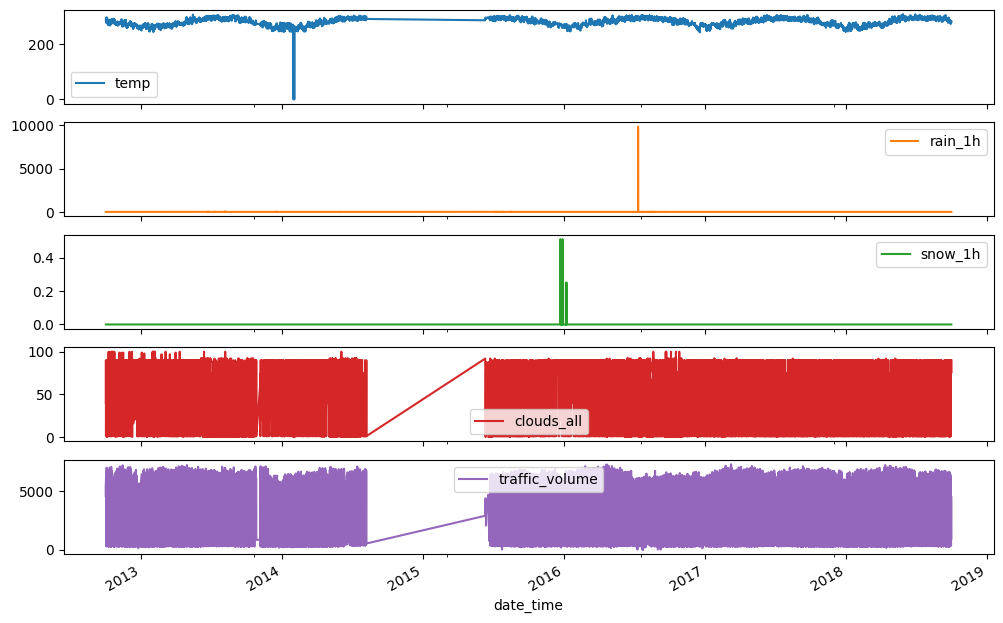

In [ ]:

plot_features = df_raw[plot_cols] # Assuming you meant to use df_raw
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:

df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [ ]:
df_raw.describe(include='object').transpose()


,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


True
True


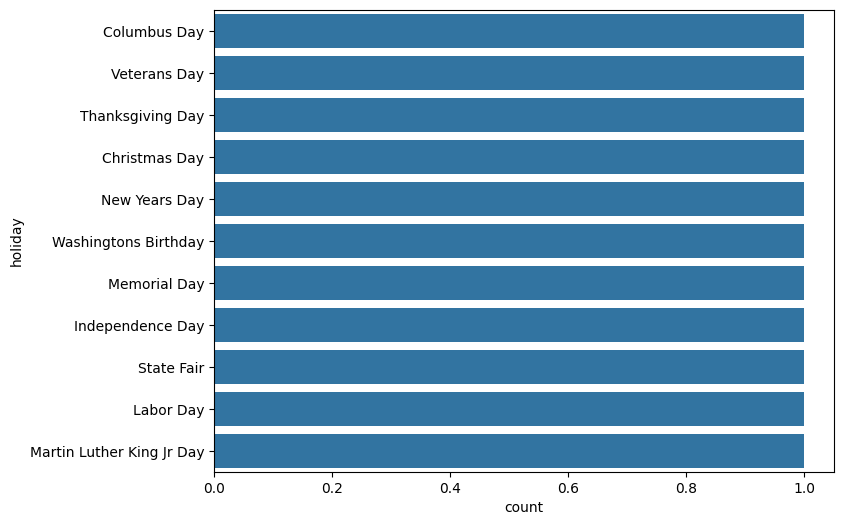

In [ ]:

print(df_raw.index.duplicated().any())


print(df_raw['holiday'].duplicated().any())
df_raw = df_raw.drop_duplicates(subset=['holiday'])

plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_raw)
plt.show()

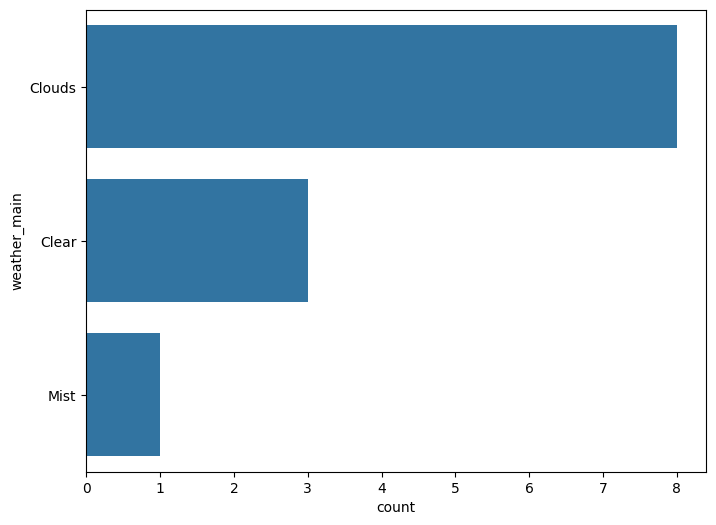

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

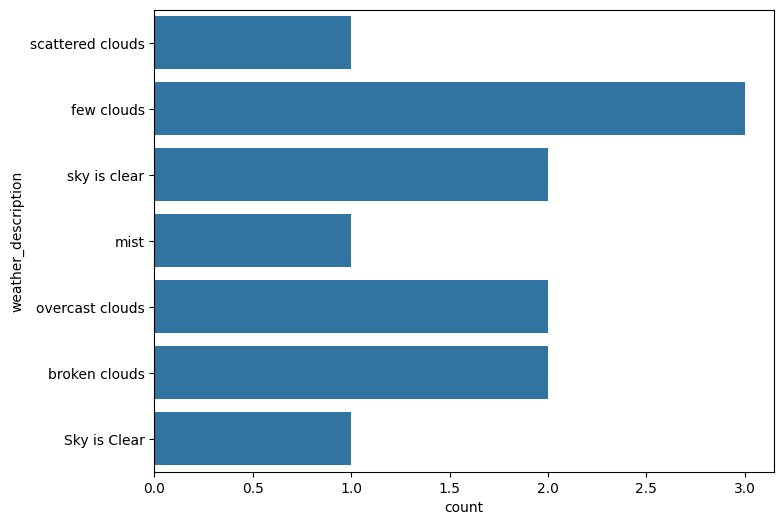

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

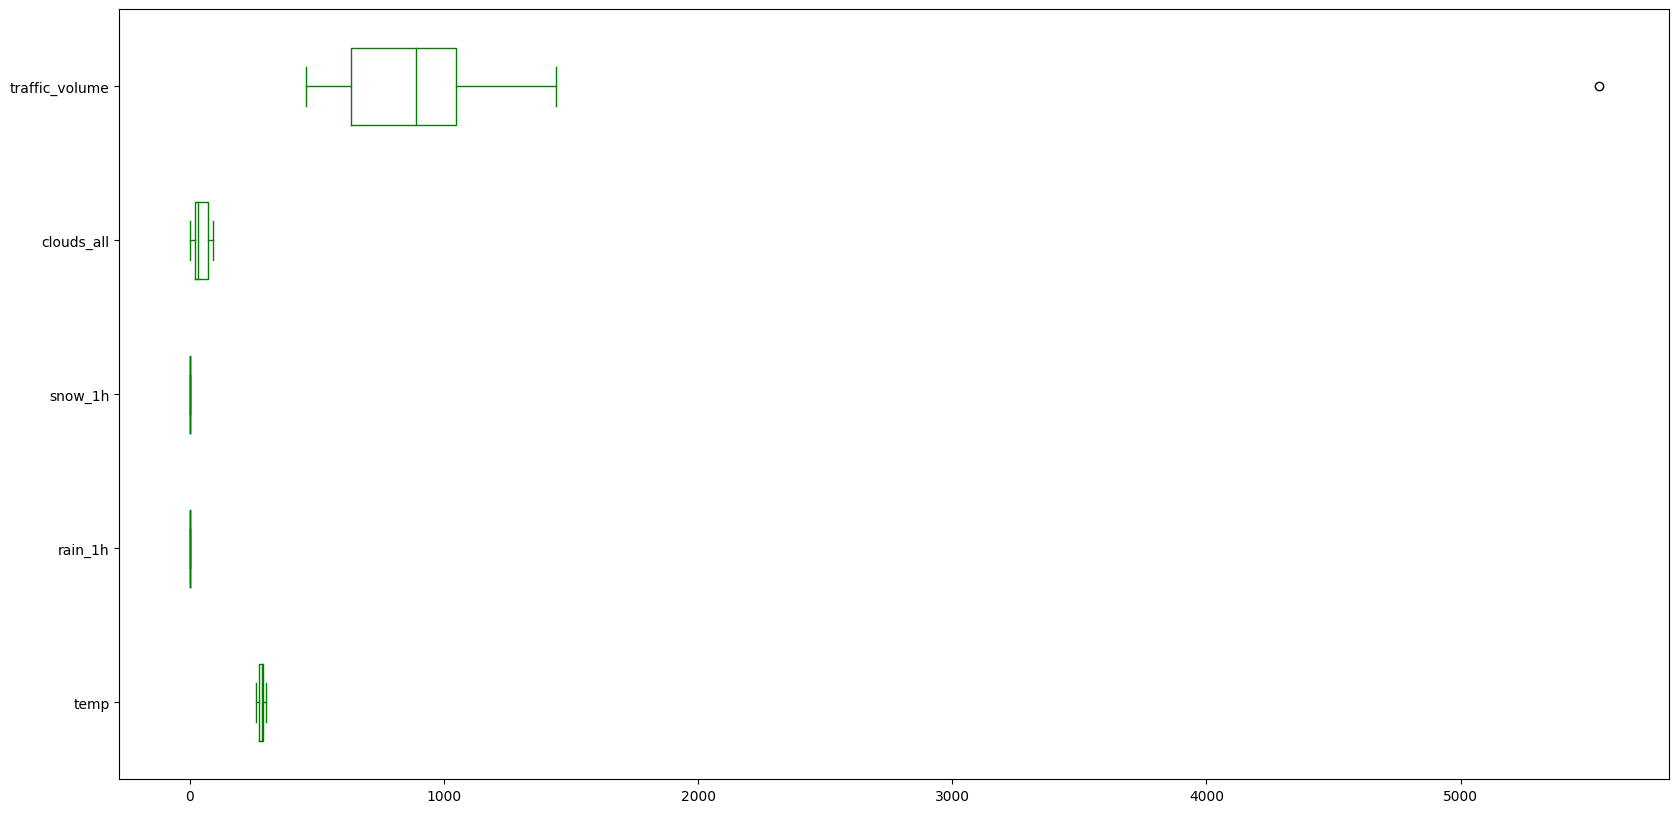

In [ ]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

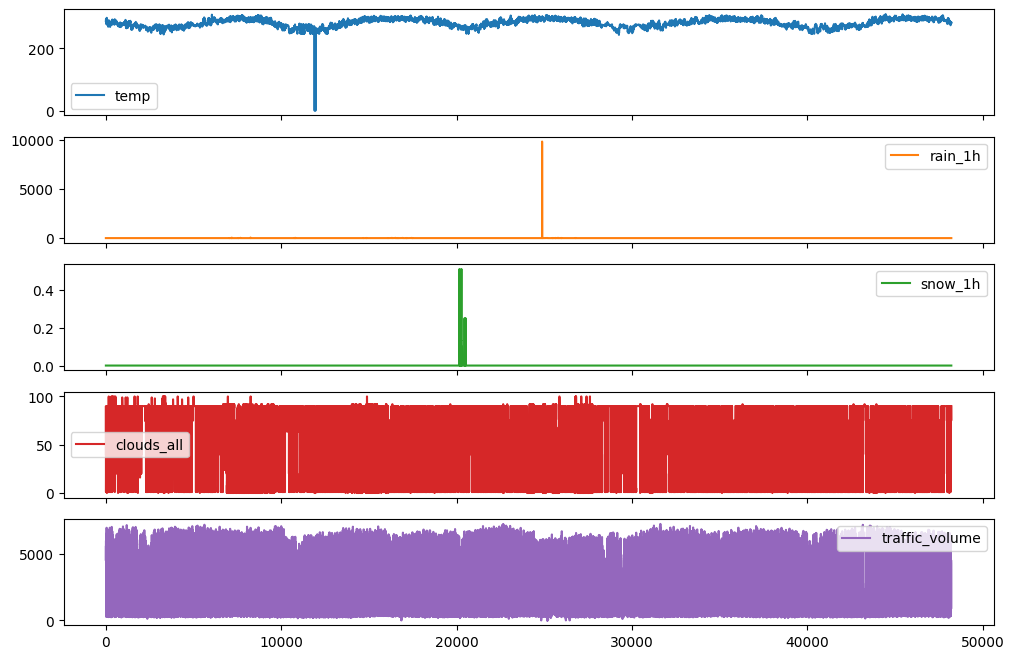

In [ ]:


import pandas as pd

df_2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz") # Load your data into df_2

plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   date_time       48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [ ]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               61 non-null     object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   date_time             48204 non-null  object 
 6   traffic_volume        48204 non-null  int64  
 7   weather_Clear         48204 non-null  bool   
 8   weather_Clouds        48204 non-null  bool   
 9   weather_Drizzle       48204 non-null  bool   
 10  weather_Fog           48204 non-null  bool   
 11  weather_Haze          48204 non-null  bool   
 12  weather_Mist          48204 non-null  bool   
 13  weather_Rain          48204 non-null  bool   
 14  weather_Smoke         48204 non-null  bool   
 15  weather_Snow       

In [ ]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   date_time             48204 non-null  object 
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-null  bool   
 15  weather_Squall     

In [ ]:

df_4.index = pd.to_datetime(df_4.index)

df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int64', length=48204)

In [ ]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000048203
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   date_time             48204 non-null  object 
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          482

In [ ]:
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday',
       ...
       'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday'],
      dtype='object', length=48204)

In [ ]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()


Index([], dtype='object')

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np

# Assuming df_4 has a 'Date' column with timestamps
df_4['timestamp_s'] = pd.to_datetime(df_4['temp']).map(pd.Timestamp.timestamp) # Changed 'Date' to 'temp'

day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(df_4['timestamp_s'] * (2 * np.pi / day))
df_4['Day cos'] = np.cos(df_4['timestamp_s'] * (2 * np.pi / day))
df_4['Year sin'] = np.sin(df_4['timestamp_s'] * (2 * np.pi / year))
df_4['Year cos'] = np.cos(df_4['timestamp_s'] * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,...,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,timestamp_s,Day sin,Day cos,Year sin,Year cos
1970-01-01 00:00:00.000000000,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000000001,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000000002,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000000003,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000000004,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000048199,283.45,0.0,0.0,75,2018-09-30 19:00:00,3543,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000048200,282.76,0.0,0.0,90,2018-09-30 20:00:00,2781,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000048201,282.73,0.0,0.0,90,2018-09-30 21:00:00,2159,False,False,False,False,...,False,False,True,1,0,0.0,0.0,1.0,0.0,1.0
1970-01-01 00:00:00.000048202,282.09,0.0,0.0,90,2018-09-30 22:00:00,1450,False,True,False,False,...,False,False,False,1,0,0.0,0.0,1.0,0.0,1.0


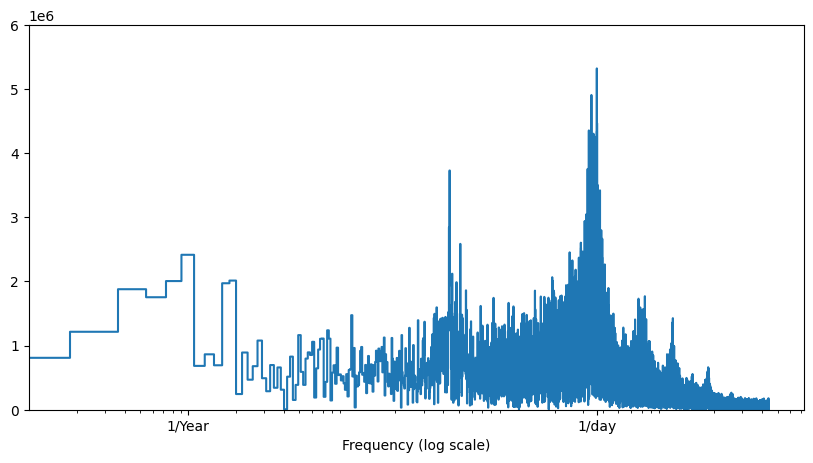

In [ ]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [ ]:

df_clean = df_4

column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 48204
Number of features: 24


In [ ]:
sorted(column_indices.items(), key=lambda x: x[1])

[('temp', 0),
 ('rain_1h', 1),
 ('snow_1h', 2),
 ('clouds_all', 3),
 ('date_time', 4),
 ('traffic_volume', 5),
 ('weather_Clear', 6),
 ('weather_Clouds', 7),
 ('weather_Drizzle', 8),
 ('weather_Fog', 9),
 ('weather_Haze', 10),
 ('weather_Mist', 11),
 ('weather_Rain', 12),
 ('weather_Smoke', 13),
 ('weather_Snow', 14),
 ('weather_Squall', 15),
 ('weather_Thunderstorm', 16),
 ('is_holiday', 17),
 ('is_weekend', 18),
 ('timestamp_s', 19),
 ('Day sin', 20),
 ('Day cos', 21),
 ('Year sin', 22),
 ('Year cos', 23)]

In [ ]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 33204
val_df:		 10000
test_df:	 5000
